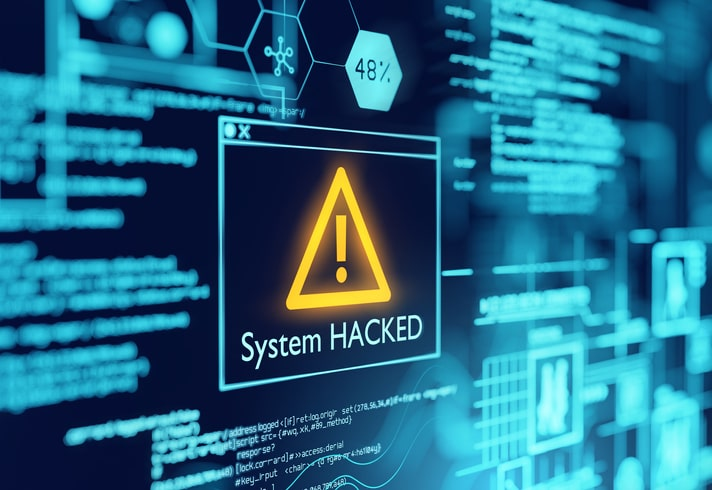

### Description

### Package imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

### Data Access

In [2]:
df1 = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
df2 = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
df2.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
df3.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
df4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df4.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [6]:
df5 = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df5.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,...,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,...,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,...,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


In [7]:
df6 = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
df6.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [8]:
df7 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df7.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,54871,1022,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,54925,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,54925,42,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,9282,4,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,55153,4,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
df8 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df8.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


#### Concatenating all the attacks

In [10]:
all_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], ignore_index = True)

In [11]:
all_df.tail(20)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2830723,443,117412844,25,23,3733,4419,607,0,149.320000,235.698027,...,20,4.761816e+05,1302278.154,4400210,50349,9.759417e+06,5.082628e+05,10000000,8484076,BENIGN
2830724,443,80507783,11,11,1146,446,483,6,104.181818,180.039339,...,20,1.267682e+06,1660537.745,2441860,93505,3.890000e+07,2.760000e+07,58500000,19400000,BENIGN
2830725,53,23721,1,1,47,175,47,47,47.000000,0.000000,...,44,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830726,53,202,2,2,90,206,45,45,45.000000,0.000000,...,32,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830727,443,187503,46,56,1313,105841,570,0,28.543478,111.468721,...,20,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830728,53,24229,4,2,144,328,36,36,36.000000,0.000000,...,20,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830729,53,203,2,2,90,122,45,45,45.000000,0.000000,...,32,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830730,443,142621,50,56,1337,104393,570,0,26.740000,107.000631,...,20,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830731,53,60066,1,1,52,116,52,52,52.000000,0.000000,...,20,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN
2830732,53,202,2,2,82,210,41,41,41.000000,0.000000,...,20,0.000000e+00,0.000,0,0,0.000000e+00,0.000000e+00,0,0,BENIGN


#### Initial preprocessing: removing all the white spaces before the column names

In [11]:
all_df.columns = all_df.columns.str.strip()

In [13]:
all_df.Label.value_counts(normalize = True)

BENIGN                        0.803004
DoS Hulk                      0.081630
PortScan                      0.056144
DDoS                          0.045227
DoS GoldenEye                 0.003636
FTP-Patator                   0.002804
SSH-Patator                   0.002083
DoS slowloris                 0.002048
DoS Slowhttptest              0.001943
Bot                           0.000695
Web Attack � Brute Force      0.000532
Web Attack � XSS              0.000230
Infiltration                  0.000013
Web Attack � Sql Injection    0.000007
Heartbleed                    0.000004
Name: Label, dtype: float64

Removing Nan and infinite numbers from the dataset

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)  # "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep]

In [13]:
clean_df = clean_dataset(all_df)
clean_df.Label.value_counts(normalize = True)

BENIGN                        0.803189
DoS Hulk                      0.081377
PortScan                      0.056157
DDoS                          0.045272
DoS GoldenEye                 0.003640
FTP-Patator                   0.002806
SSH-Patator                   0.002085
DoS slowloris                 0.002050
DoS Slowhttptest              0.001945
Bot                           0.000692
Web Attack � Brute Force      0.000533
Web Attack � XSS              0.000231
Infiltration                  0.000013
Web Attack � Sql Injection    0.000007
Heartbleed                    0.000004
Name: Label, dtype: float64

#### Data engineering

I want to create a new column and called it y such that y = 0 if the Label = BENIGN, otherwise y = 1

In [22]:
clean_df['y'] = 1
clean_df

/var/folders/qc/lxgcggjd0nz6d42n4yrv6xfw0000gp/T/ipykernel_1878/1610025907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['y'] = 1


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
2830739,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
2830740,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
2830741,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1


In [23]:
clean_df.loc[clean_df.Label=='BENIGN', 'y'] = 0
clean_df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
0,49188,4,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,49188,1,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,49486,3,2,0,12,0,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,443,196135,49,57,1331,105841,570,0,27.163265,108.067176,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2830739,443,378424,49,59,1325,104393,570,0,27.040816,108.095051,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2830740,443,161800,70,103,1427,215903,570,0,20.385714,90.746389,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2830741,443,142864,50,62,1331,110185,570,0,26.620000,107.027727,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [24]:
clean_df.y.value_counts(normalize = True)

0    0.803189
1    0.196811
Name: y, dtype: float64

In [25]:
clean_df.y.value_counts()

0    2271320
1     556556
Name: y, dtype: int64

In [20]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

#### Train test split

In [27]:
clean_df_train, clean_df_test = train_test_split(clean_df.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.2, # set aside 20% test set
                                              stratify=clean_df.y.values)

### Handling an imbalanced data set

In [28]:
clean_df_train.y.value_counts()

0    1817055
1     445245
Name: y, dtype: int64

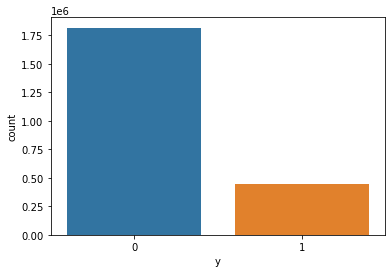

In [29]:
sns.countplot(data = clean_df, x = clean_df_train['y'])
plt.show()

Technique: I want to use resample() method from sklearn to upsample the minority class 

In [20]:
df_major = clean_df_train[(clean_df_train['y']==0)]
df_minor = clean_df_train[(clean_df_train['y']==1)]

In [28]:
df_major.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
1401727,53,60582,1,1,49,199,49,49,49.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
377831,53,75884,2,2,62,182,31,31,31.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2560465,80,5988094,3,1,12,0,6,0,4.0,3.464102,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2317816,88,781,2,2,496,2820,248,248,248.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
184551,80,10098369,5,5,2051,805,1448,0,410.2,636.198240,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [29]:
df_minor.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
2644766,6901,56,1,1,2,6,2,2,2.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,1
1109655,80,85301979,9,5,748,11595,368,0,83.111111,161.536718,...,987.0,0.0,987,987,85000000.0,0.0,85000000,85000000,DoS Hulk,1
2649821,1301,32,1,1,2,6,2,2,2.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,1
2673887,8701,41,1,1,2,6,2,2,2.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,1
2681441,49152,49,1,1,2,6,2,2,2.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,1


upsampling the minority class

In [21]:
df_minor_up = resample(df_minor,
                      replace = True, # sample with replacement
                      n_samples = 1817055, # to match the count of majority class
                      random_state = 412) # to make my result reproduciable

In [22]:
df_sampled = pd.concat([df_minor_up, df_major])# this is my new training set

In [32]:
df_sampled

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y
2398343,80,8032843,4,0,24,0,6,6,6.0,0.000000,...,2007.0,0.0,2007,2007,8030836.0,0.0,8030836,8030836,DDoS,1
2694969,3476,46,1,1,0,6,0,0,0.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,PortScan,1
1249418,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1
1239737,80,86061818,10,5,287,11595,287,0,28.7,90.757369,...,1000.0,0.0,1000,1000,85100000.0,0.0,85100000,85100000,DoS Hulk,1
595274,21,215,2,1,14,0,14,0,7.0,9.899495,...,0.0,0.0,0,0,0.0,0.0,0,0,FTP-Patator,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454424,53,210,2,2,80,452,40,40,40.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1428794,53,168168,4,2,172,216,43,43,43.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
357216,53,247212,4,4,124,636,31,31,31.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2298787,80,72,2,0,12,0,6,6,6.0,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [23]:
df_sampled.y.value_counts()

1    1817055
0    1817055
Name: y, dtype: int64

#### 5. EDA

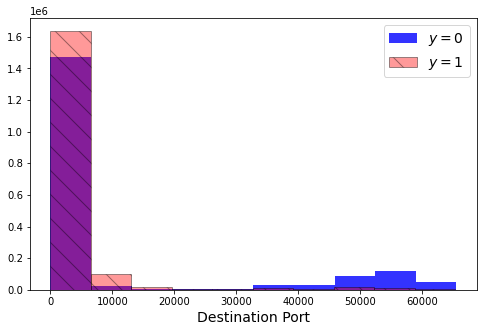

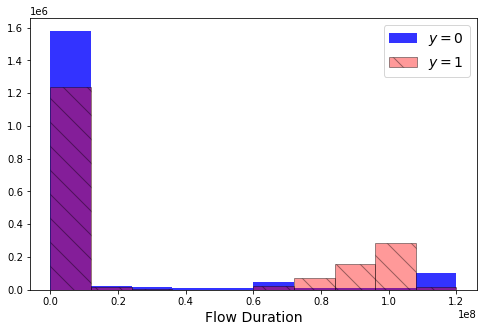

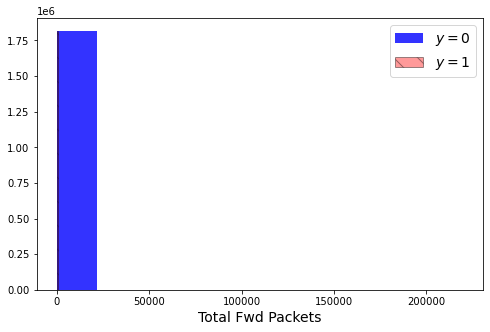

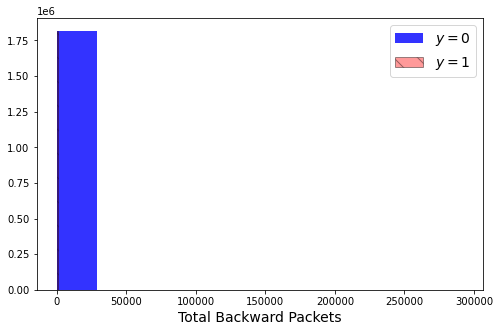

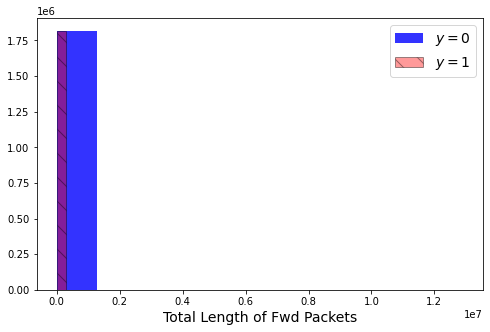

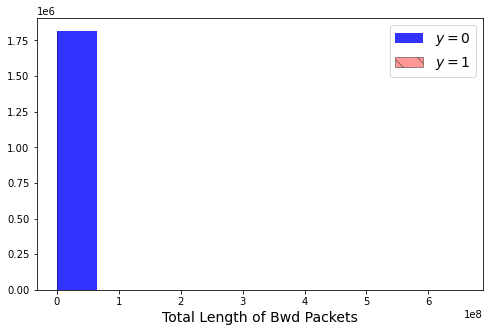

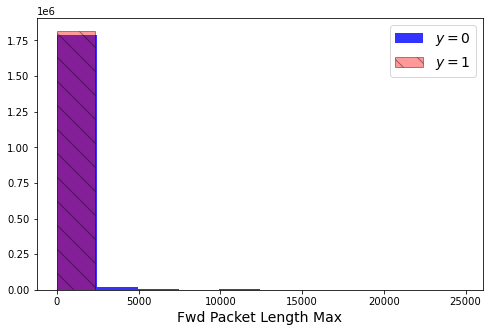

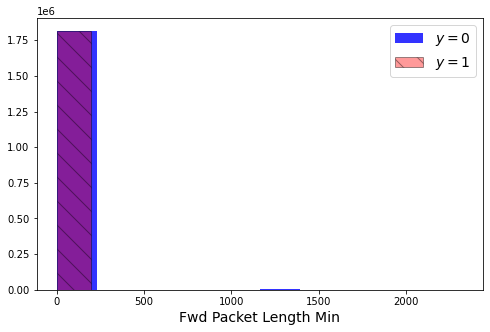

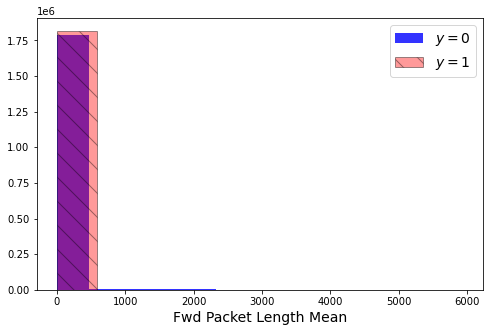

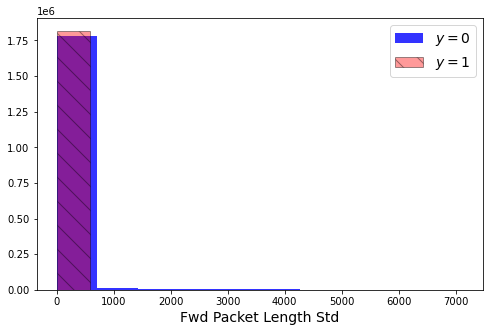

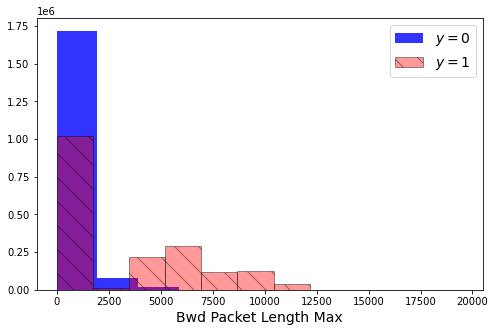

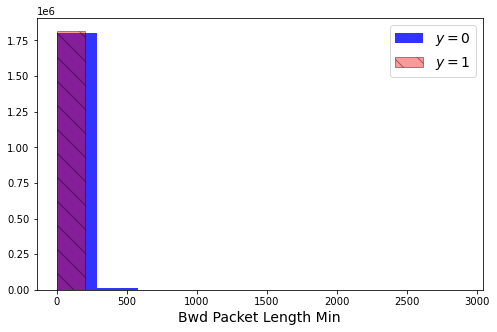

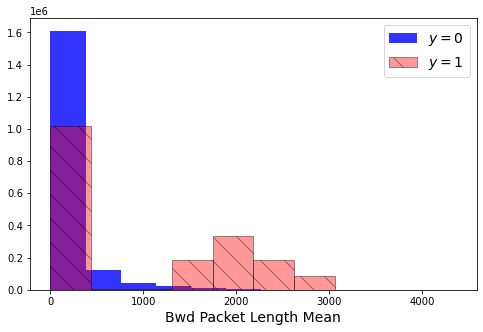

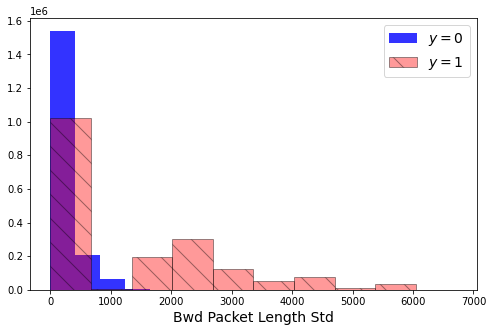

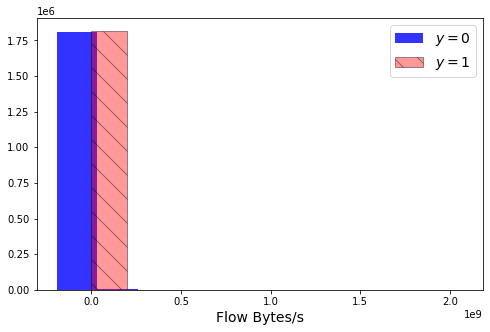

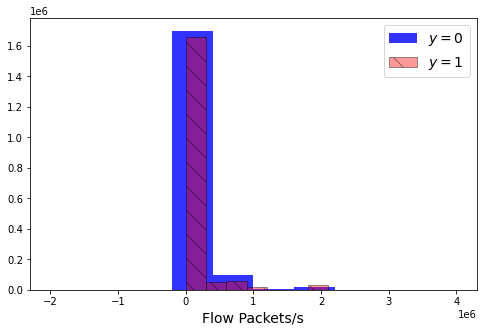

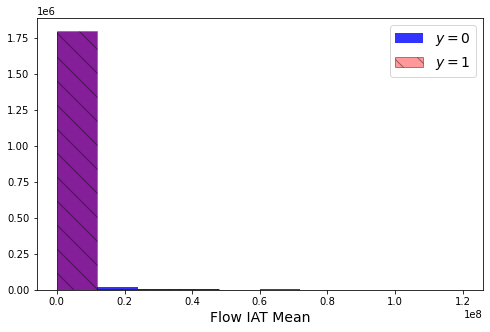

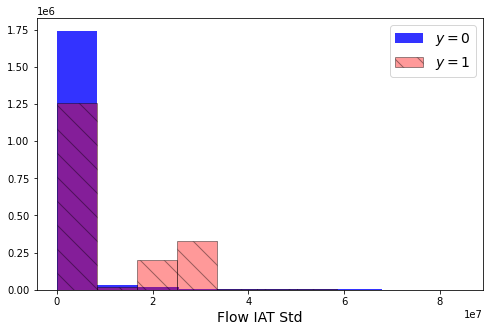

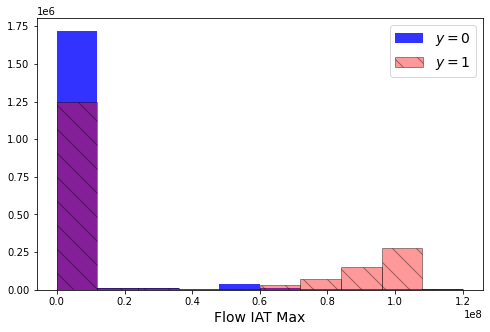

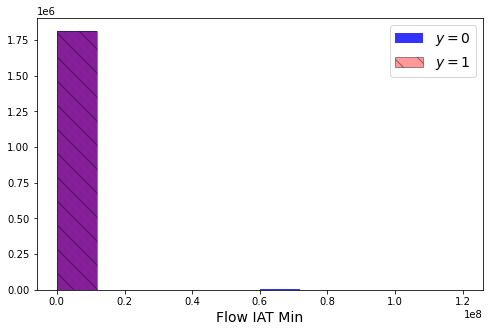

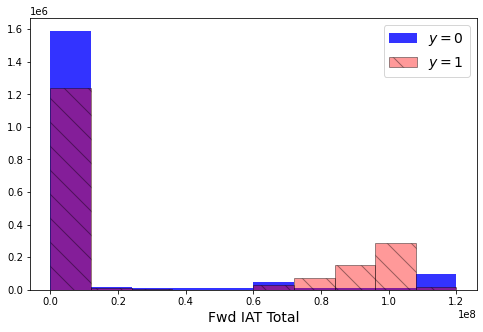

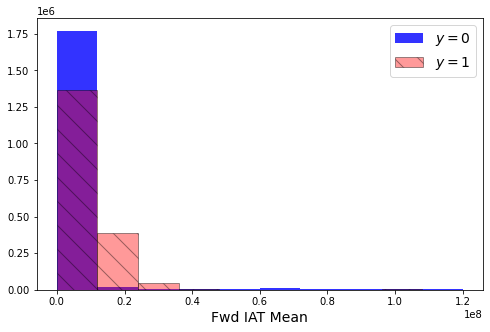

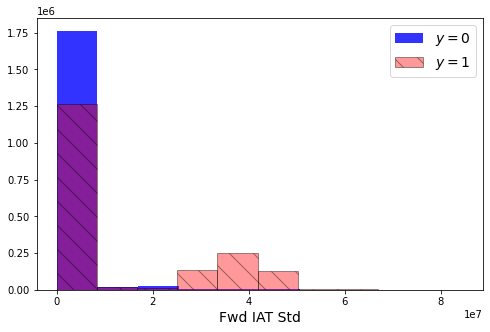

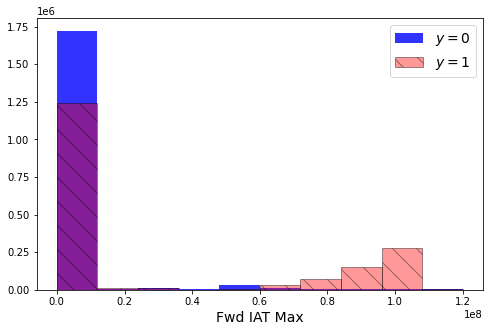

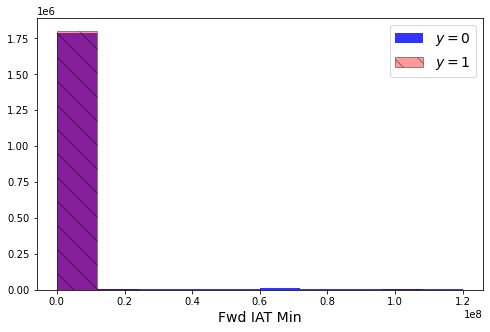

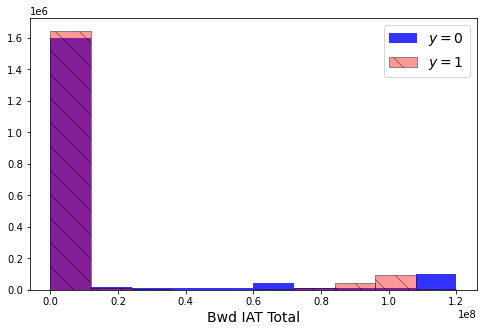

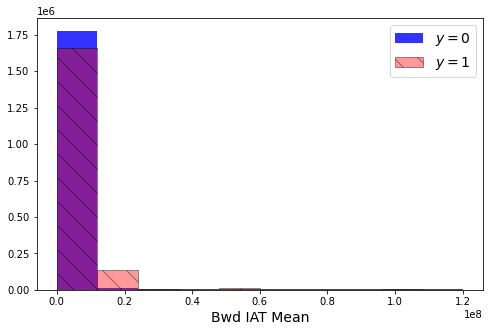

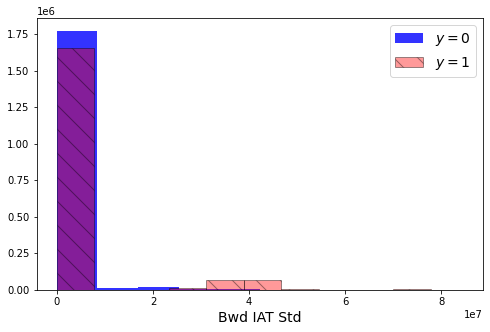

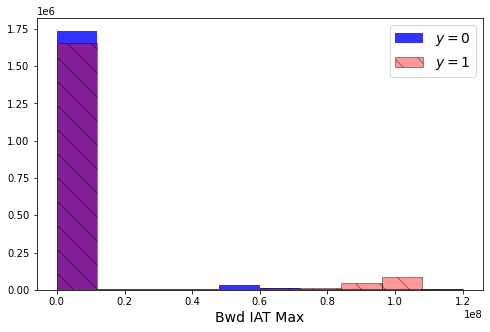

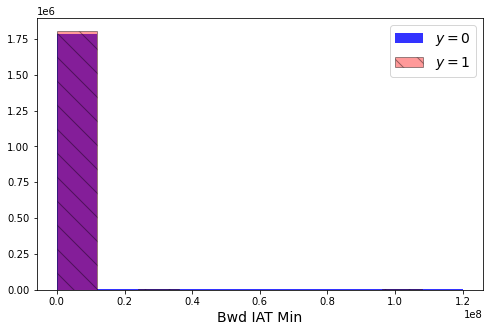

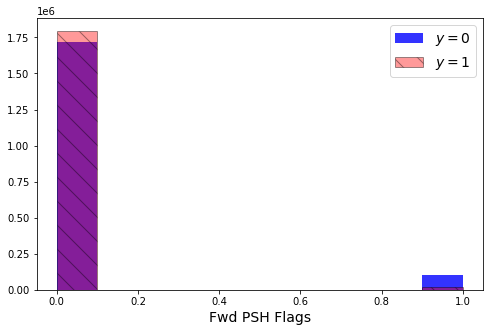

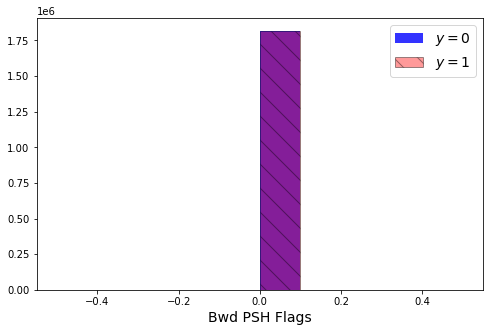

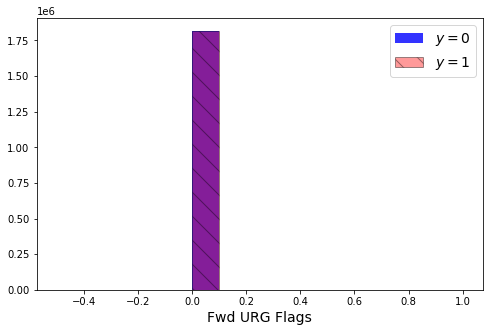

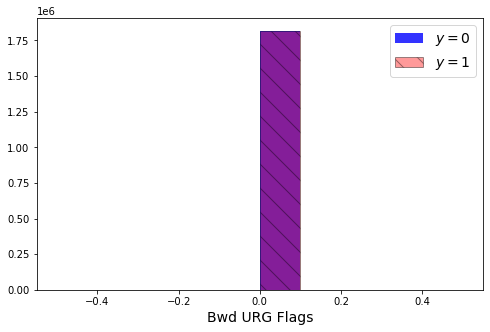

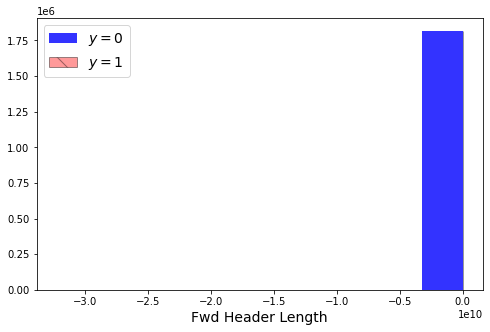

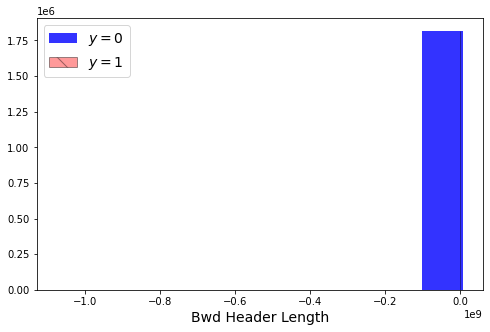

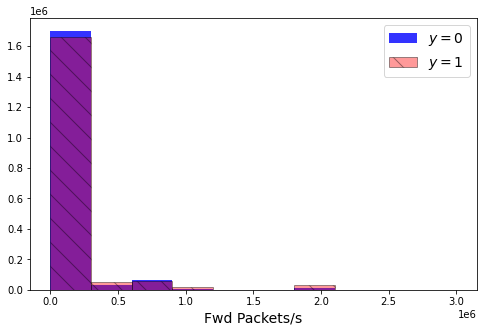

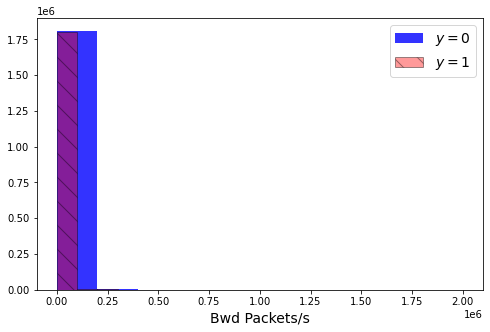

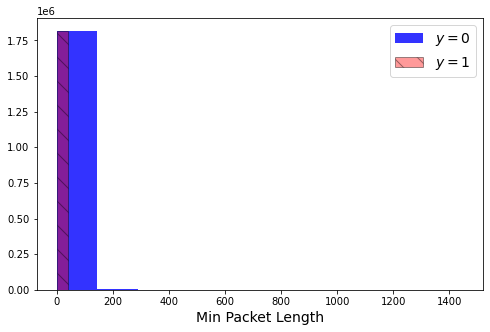

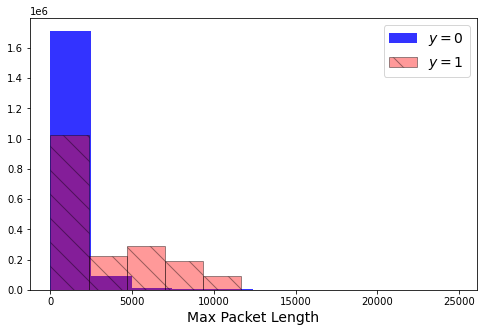

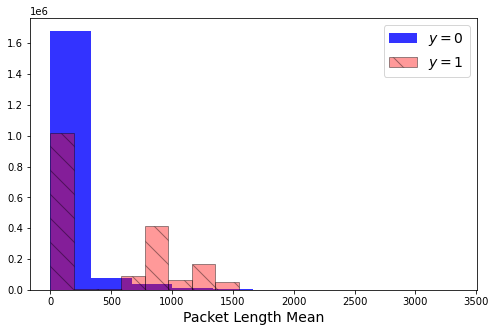

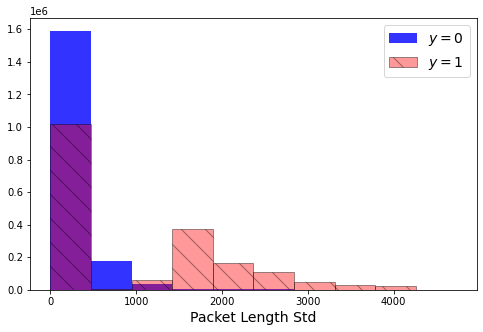

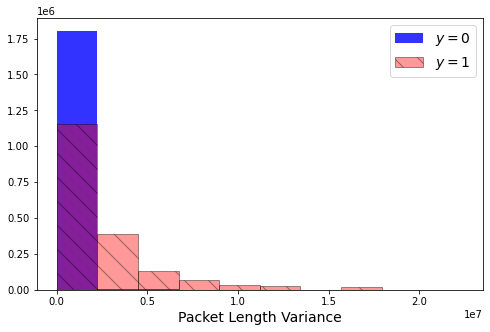

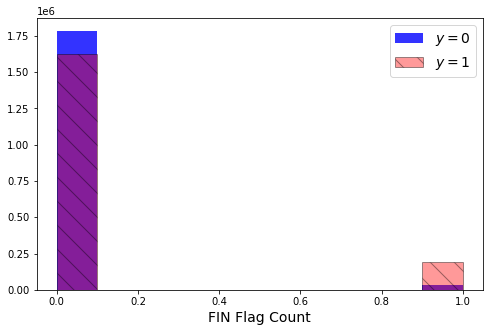

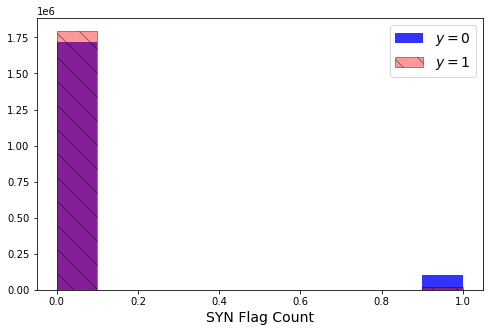

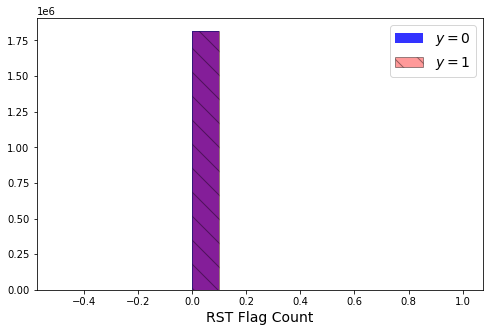

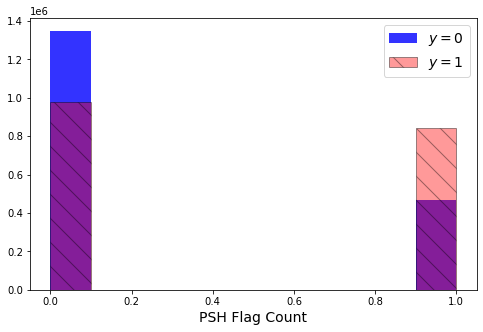

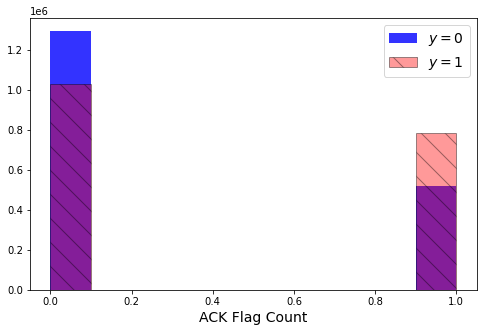

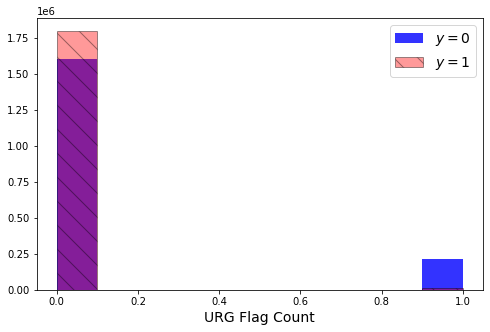

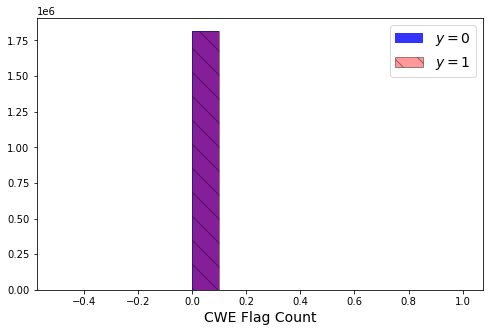

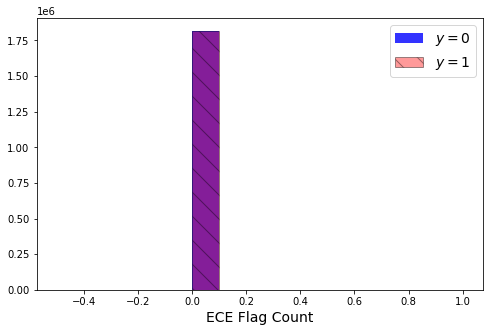

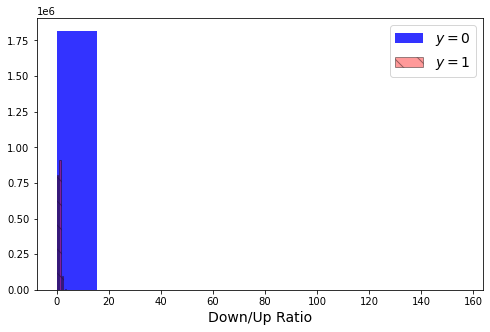

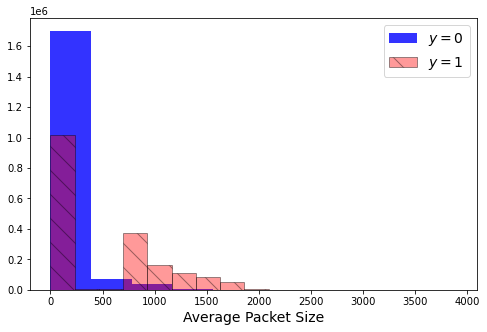

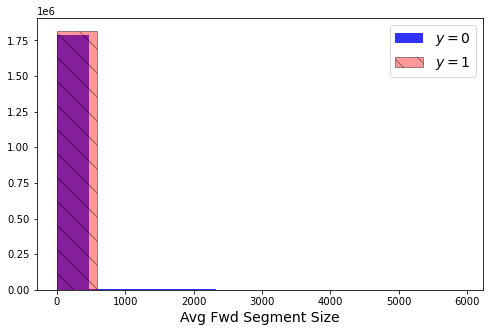

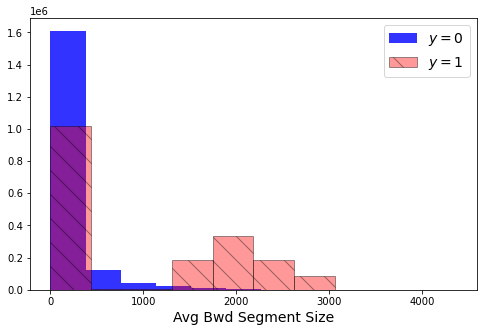

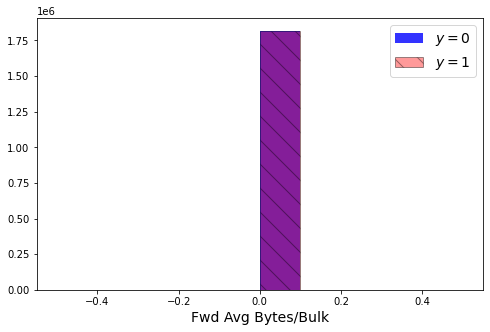

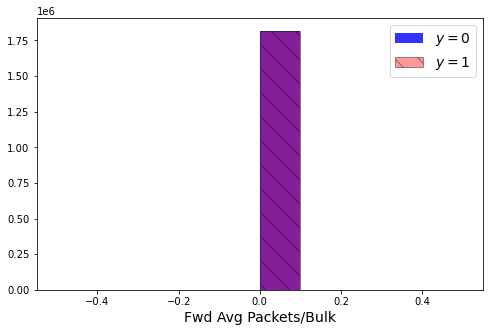

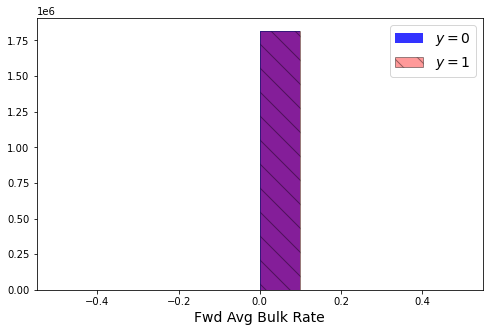

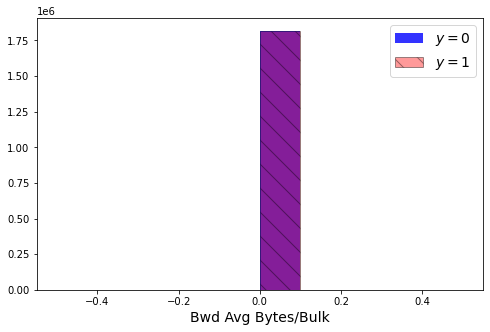

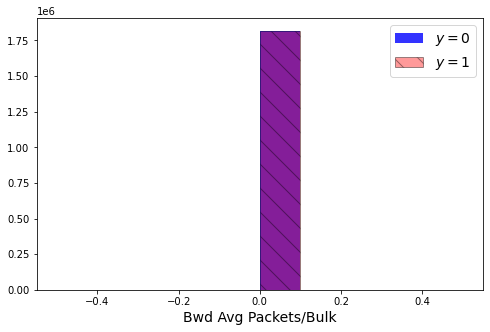

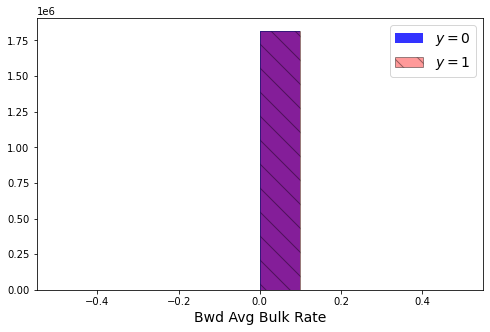

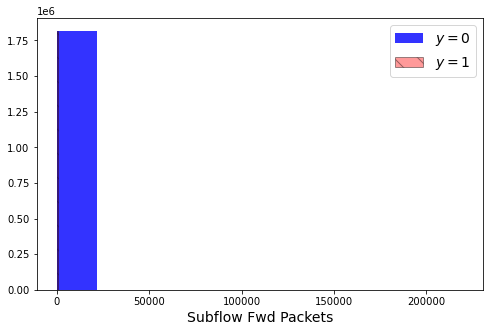

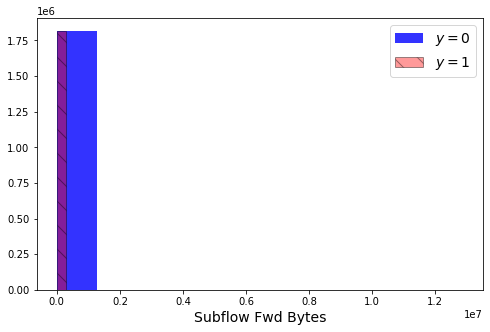

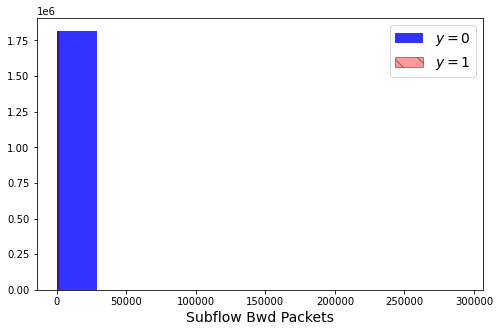

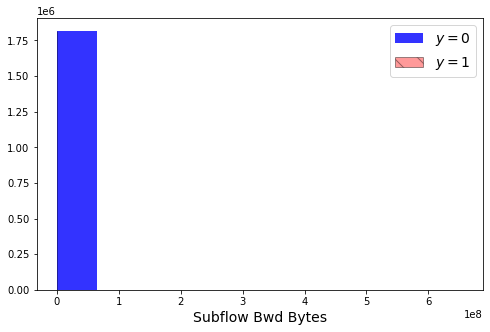

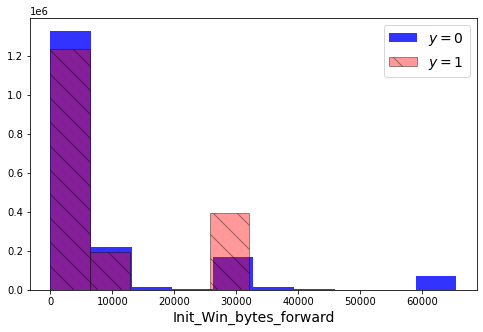

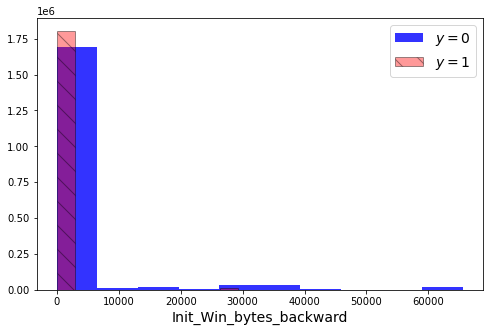

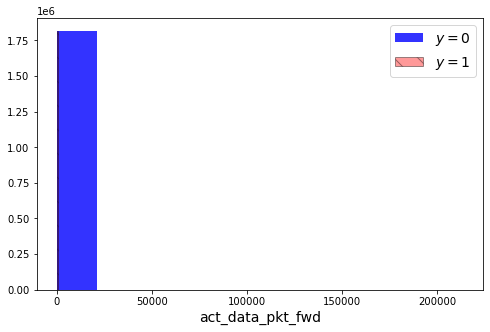

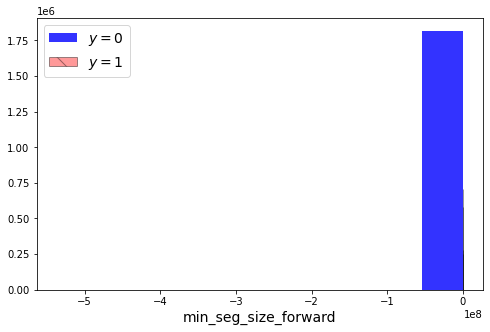

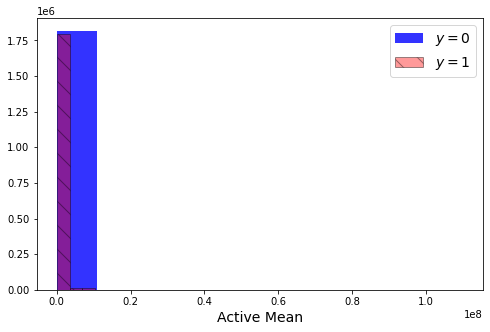

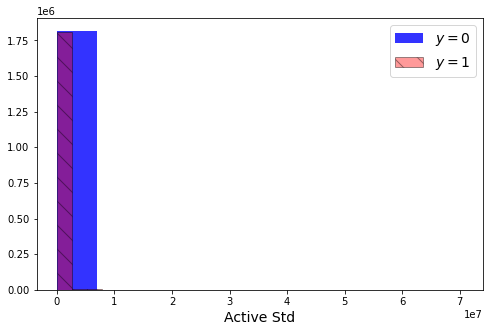

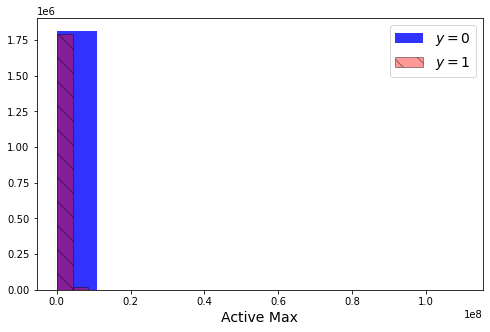

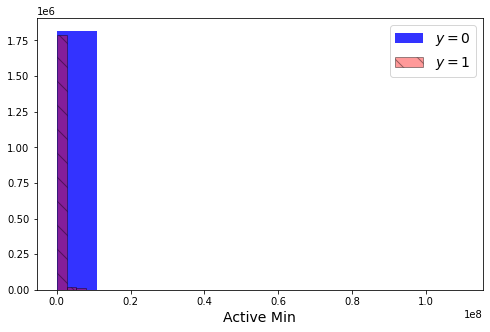

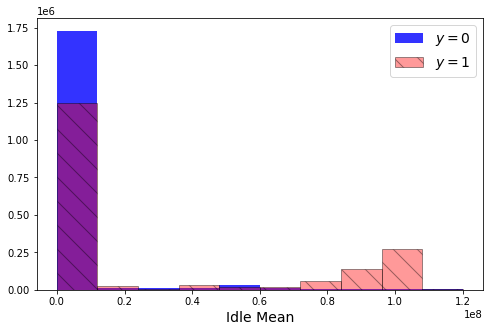

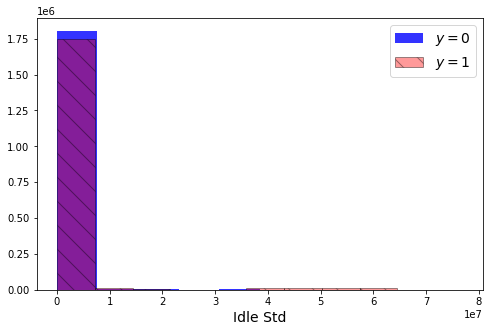

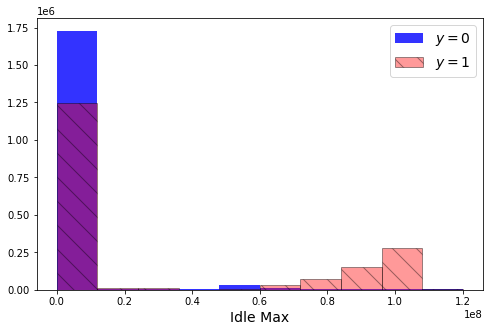

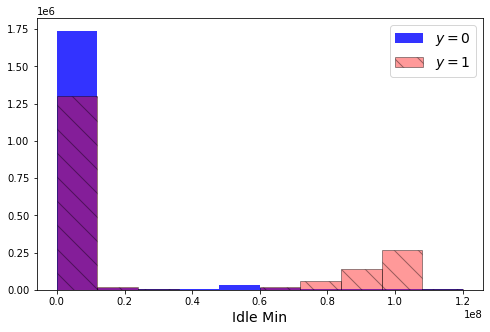

In [34]:
for col in df_sampled.columns[:-2]:
    plt.figure(figsize=(8,5))


    plt.hist(df_sampled.loc[df_sampled.y==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(df_sampled.loc[df_sampled.y==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

#### PCA decomposition for dimension reduction

In [25]:
sns.set_style("whitegrid")

In [30]:
features = df_sampled.columns[:-2]

pca = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

fit = pca.fit_transform(df_sampled[features])

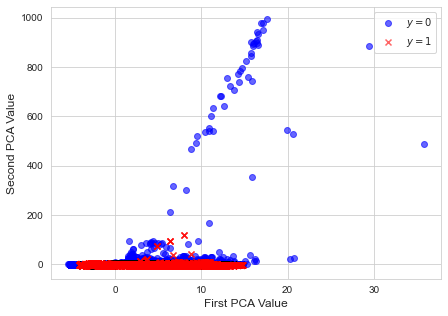

In [27]:
plt.figure(figsize=(7,5))

plt.scatter(fit[df_sampled.y==0, 0], 
            fit[df_sampled.y==0, 1],
            color = 'b',
            label="$y=0$",
            alpha=.6)

plt.scatter(fit[df_sampled.y==1, 0], 
            fit[df_sampled.y==1, 1],
            color='r',
            marker='x',
            label="$y=1$",
            alpha=.6)

plt.legend(fontsize=10)

plt.xlabel("First PCA Value", fontsize=12)
plt.ylabel("Second PCA Value", fontsize=12)

plt.show()

### Machine Learning Models

#### k-fold cross-validation with  $𝑘$ nearest neighbors
I want to run 5-fold cross-validation below to find the optimal value of  $𝑘$ for a  $𝑘$ nearest neighbors model fit on the first and second PCA values.

In [27]:
n_splits=5
kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=2013)

In [41]:
ks = range(1, 51)

pca_2_accs = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(df_sampled, df_sampled.y):
    print("CV Split", i)
    df_tt = df_sampled.iloc[train_index]
    df_ho = df_sampled.iloc[test_index]
    
    ## Note, putting the PCA here speeds up the loop
    pca_pipe = Pipeline([('scale', StandardScaler()),
                               ('pca', PCA(2))])
    
    
    pca_tt = pca_pipe.fit_transform(df_tt[features].values)
    pca_ho = pca_pipe.transform(df_ho[features].values)
    
    j = 0
    for k in ks:
        knn = KNeighborsClassifier(k)
        
        knn.fit(pca_tt, df_tt.y.values)
        
        pred = knn.predict(pca_ho)
        
        pca_2_accs[i,j] = f1_score(df_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

CV Split 0
CV Split 1
CV Split 2
CV Split 3
CV Split 4


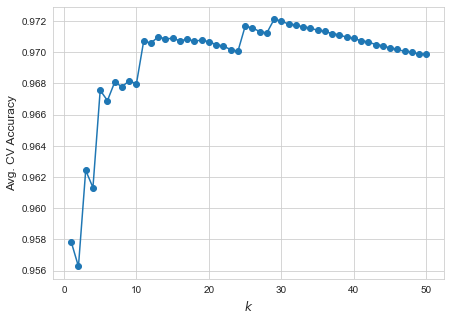

In [42]:
plt.figure(figsize=(7,5))


plt.plot(ks, 
         np.mean(pca_2_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

#### Finding the optimal number of PCA

In [30]:
ks = range(1, 10)## reduce to 10
comps = range(2,6)

pca_accs = np.zeros((n_splits, len(comps), len(ks)))

i = 0
for train_index, test_index in kfold.split(df_sampled, df_sampled.y):
    print("CV Split", i)
    df_tt = df_sampled.iloc[train_index]
    df_ho = df_sampled.iloc[test_index]
    
    j = 0
    for n_comps in comps:
        pca_pipe = Pipeline([('scale', StandardScaler()),
                               ('pca', PCA(n_comps))])
    
    
        pca_tt = pca_pipe.fit_transform(df_tt[features].values)
        pca_ho = pca_pipe.transform(df_ho[features].values)
        
        k = 0
        for neighbors in ks:
            knn = KNeighborsClassifier(neighbors)
            
            knn.fit(pca_tt,
                    df_tt.y.values)

            pred = knn.predict(pca_ho)

            pca_accs[i,j,k] = f1_score(df_ho.y.values, pred)
            
            k = k + 1
        j = j + 1
    i = i + 1

CV Split 0
CV Split 1
CV Split 2
CV Split 3
CV Split 4


In [31]:
max_index = np.unravel_index(np.argmax(np.mean(pca_accs, axis=0), axis=None), 
                                       np.mean(pca_accs, axis=0).shape)


print("The pair with the highest AVG CV Accuracy was",
         "k =", ks[max_index[1]],
         "and number of components =", np.round(comps[max_index[0]],2))
print("The highest AVG CV Accuracy was", np.max(np.mean(pca_accs, axis=0)))

The pair with the highest AVG CV Accuracy was k = 7 and number of components = 3
The highest AVG CV Accuracy was 0.9922989490804422


####  SVM Model

In [ ]:
Cs = [.01, .1, 1, 10, 25, 50, 75, 100, 125, 150]

## this will hold the CV accuracies
C_accs1 = np.zeros((n_splits, len(Cs)))


## the cross-validation
i = 0
for train_index, test_index in kfold.split(df_sampled, df_sampled.y):
    df_tt = df_sampled.iloc[train_index]
    df_ho = df_sampled.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
    
        pipe.fit(df_tt[features],
                    df_tt.y)
    
        pred = pipe.predict(df_ho[features])

        C_accs1[i, j] = f1_score(df_ho.y, pred)
        
        j = j + 1
    i = i + 1

This keeps run forever, I guess I am constraint by the GPU capability. I will continue this on AWS Sagemaker and update the result.

### Conclusion